<img src='./imagens/titanic.jpg'></img>
<h1 align='center'>ANALISANDO O DESASTRE DO TITANIC</h1>

<p>O Navio Titanic afundou nas águas do Oceano Atlântico em 14 de Abril de 1912 quando colidiu as 23h40 contra um iceberg.
Segundo os relatórios da Junta Comercial Britânica 1514 pessoas morreram. Isto serviu como base para a criar de diversas regras de segurança marítima.</p>

<h1>Dados</h1>

<p>Será utilizado os dados coletados na plataforma Kaggle, disponínel em <a href='https://www.kaggle.com/c/titanic'> neste link</a>. Este conjunto de dados possui informações de todos os passageiros, mas sim de apenas 891.</p>

<h1>Perguntas</h1>

Perguntas que gostaria de saber a resposta:
<br>
<br>
<li>Quantas pessoas sobreviveram ao desastre, segundo este <i>dataset</i>.</li>
<li>Quantas pessoas não sobreviveram?</li>
<li>A classe que teve maior indice de sobrevivência?</li>
<li>Qual foi a proporção de homens e mulheres que sobreviveram a tragédia?</li>
<li>Quantas crianças sobreviveram?</li>
<li>O capitão afundou com seu navio?</li>
<li>Existia um Jack e uma Rose?</li>

<h2>Data Cleaning e Data Wrangling</h2>

In [50]:
# importando as blibliotecas para trabalhar com os dados
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as mn
import gc

# personalizando algumas configurações.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi':75,
'figure.autolayout': False,
'figure.figsize' :[16,8],
'axes.labelsize' : 18,
'axes.titlesize' : 18,
'font.size' : 18,
'lines.linewidth' : 2.0,
'lines.markersize' : 8,
'legend.fontsize' : 16,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16}
sns.set(style='dark', rc = rc)
default_color = '#0277bd'
colormap = plt.cm.cool

# magic
%matplotlib inline

### Visualizando os dados

In [96]:
# visualizando os dados
titanic_data = pd.read_csv('./data/train.csv', na_values = -1)
print('Este dataset possui {} linhas e {} colunas'.format(titanic_data.shape[0], titanic_data.shape[1]))
titanic_data.head()

Este dataset possui 891 linhas e 12 colunas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


| Variable | Definition   | Key                        |
|----------|--------------|----------------------------|
| survival | sobrevivente | 0 = No, 1 = Yes            |
| pclass   | classe       | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex      | Sexo         | male=homem female = mulher |
| Age      | idade        | em anos                    |
| sibsp    | irmãos/côjuges| quantidade abordo         |
| parch    | pais/crianças| quantidade abordo          |
| ticket   | passagem     | numero da passagem         |
| fare     | valor        | valor da passagem          |
| cabin    | cabine       | numero da cabine           |
| embarked | embarque     | qual porto que embarcou    |

### Quantidade de Passageiros

In [98]:
qtd_passageiros = titanic_data['PassengerId'].count()
print('Quantidade de passageiros: {}'.format(qtd_passageiros))

Quantidade de passageiros: 891


### Limpando dados

In [99]:
#removendo colunas
titanic_data.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S


### Ajustando o dataset

In [100]:
titanic_data.columns = ['Sobreviveu','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Tarifa','Embarque']
titanic_data['Embarque'] = titanic_data['Embarque'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])
#titanic_data['Sobreviveu'] = titanic_data['Sobreviveu'].replace([0,1],['Não','Sim'])
titanic_data['Sexo'] = titanic_data['Sexo'].replace(['male','female'],['Masculino','Feminino'])

In [101]:
titanic_data.head(10)

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",Masculino,22.00,1,0,7.25,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.00,1,0,71.28,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",Feminino,26.00,0,0,7.92,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.00,1,0,53.10,Southampton
4,0,3,"Allen, Mr. William Henry",Masculino,35.00,0,0,8.05,Southampton
5,0,3,"Moran, Mr. James",Masculino,nan,0,0,8.46,Queenstown
6,0,1,"McCarthy, Mr. Timothy J",Masculino,54.00,0,0,51.86,Southampton
7,0,3,"Palsson, Master. Gosta Leonard",Masculino,2.00,3,1,21.07,Southampton
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.00,0,2,11.13,Southampton
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.00,1,0,30.07,Cherbourg


### Verificando dados inválidos

In [102]:
titanic_data.dtypes

Sobreviveu          int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

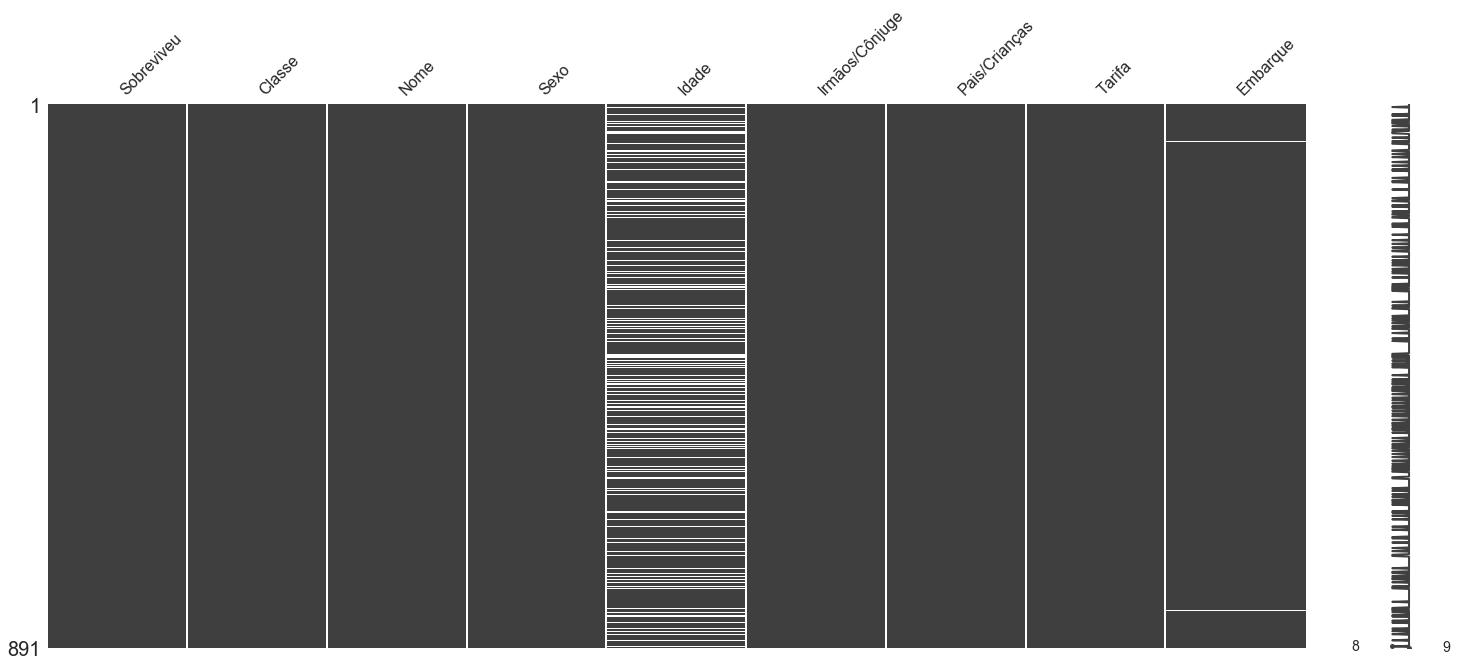

In [103]:
# biblioteca missingno 
mn.matrix(titanic_data)

In [115]:
titanic_data.describe()

,Sobreviveu,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,13.00,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,22.00,0.00,0.00,7.91
50%,0.00,3.00,29.70,0.00,0.00,14.45
75%,1.00,3.00,35.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [110]:
# Ajustando a idade pela média
titanic_data['Idade'].fillna(29.70, inplace = True)
titanic_data.head(10)

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",Masculino,22.00,1,0,7.25,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.00,1,0,71.28,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",Feminino,26.00,0,0,7.92,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.00,1,0,53.10,Southampton
4,0,3,"Allen, Mr. William Henry",Masculino,35.00,0,0,8.05,Southampton
5,0,3,"Moran, Mr. James",Masculino,29.70,0,0,8.46,Queenstown
6,0,1,"McCarthy, Mr. Timothy J",Masculino,54.00,0,0,51.86,Southampton
7,0,3,"Palsson, Master. Gosta Leonard",Masculino,2.00,3,1,21.07,Southampton
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.00,0,2,11.13,Southampton
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.00,1,0,30.07,Cherbourg


In [127]:
# Ajustando a embarque pela max
titanic_data['Embarque'].value_counts()


Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarque, dtype: int64

In [128]:
titanic_data['Embarque'].fillna('Southampton', inplace = True)

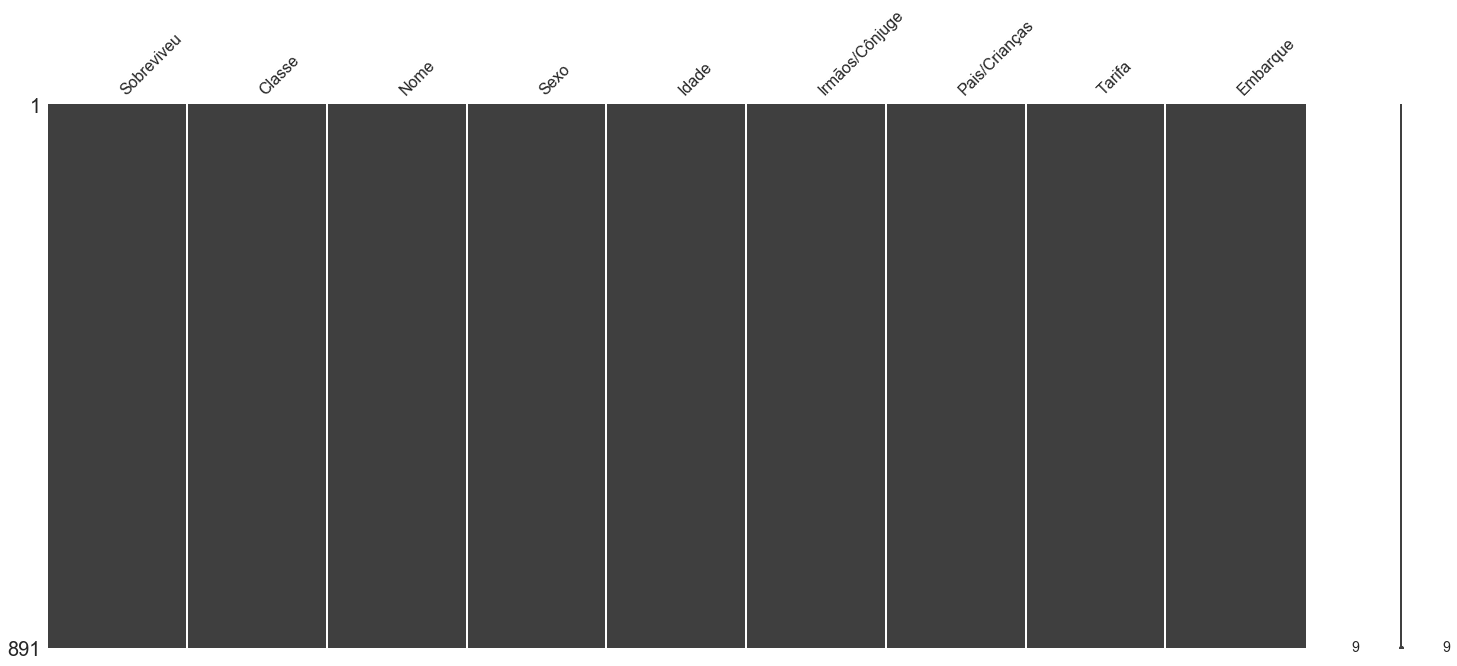

In [129]:
# biblioteca missingno 
mn.matrix(titanic_data)

<h1>Repostas</h1>

Primeira pergunta:<br>
<b>Quantas pessoas sobreviveram ao desastre, segundo este dataset?</b>

In [141]:
sobreviventes = titanic_data['Sobreviveu'].value_counts()
print('Total de passageiros:', titanic_data['Sobreviveu'].count())
print('Quantidade de sobreviventes ao desastre:', sobreviventes[1])

Total de passageiros: 891
Quantidade de sobreviventes ao desastre: 342


Segunda pergunta:<br>
<b>Quantas pessoas não sobreviveram?</b>

In [142]:
print('Total de passageiros:', titanic_data['Sobreviveu'].count())
print('Quantidade de mortos no desastre:', sobreviventes[0])

Total de passageiros: 891
Quantidade de mortos no desastre: 549


### Gráfico

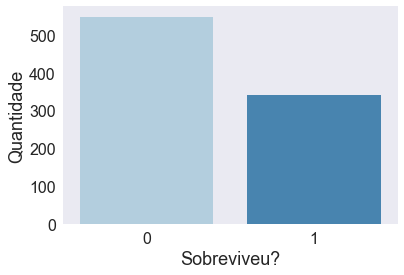

In [199]:
sobreviventes = sns.countplot(data=titanic_data, x='Sobreviveu', palette='Blues')
plt.xlabel('Sobreviveu?')
plt.ylabel('Quantidade')
plt.show()

Terceira pergunta:<br>
<b>A classe que teve maior indice de sobrevivência?</b>

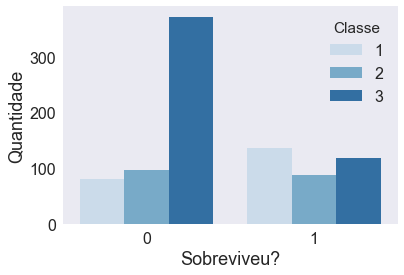

In [198]:
sobreviventes_classe = sns.countplot(data=titanic_data, x='Sobreviveu', hue='Classe', palette='Blues')

plt.xlabel('Sobreviveu?')
plt.ylabel('Quantidade')
plt.show()

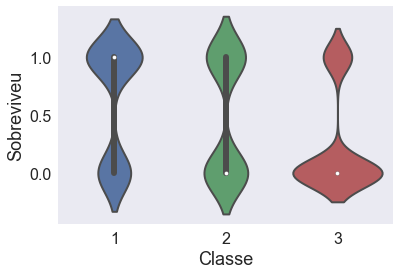

In [207]:
# Verificando a proporção
sobreviventes_classe = titanic_data.copy()
sobreviventes_classe['Sobreviveu'] = titanic_data['Sobreviveu'] == 1

sns.violinplot(data=sobreviventes_classe, y='Sobreviveu', x='Classe', size=10)
plt.show()

Quarta pergunta:<br>
<b>Qual foi a proporção de homens e mulheres que sobreviveram a tragédia?</b>

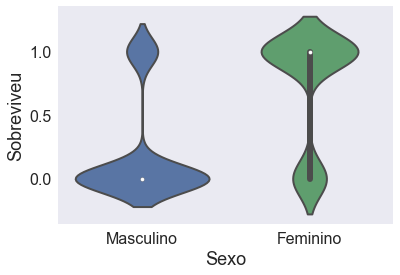

In [209]:
# Verificando a proporção
sobreviventes_sexo = titanic_data.copy()
sobreviventes_sexo['Sobreviveu'] = titanic_data['Sobreviveu'] == 1

sns.violinplot(data=sobreviventes_classe, y='Sobreviveu', x='Sexo', size=10)
plt.show()

Quinta pergunta:<br>
<b>Quantas crianças sobreviveram?</b>

In [215]:
#criando um DataFrame que contenha apenas mulheres e crianças
criancas = (titanic_data['Idade'] <= 15) & (titanic_data['Idade'] > 0)
criancas = titanic_data[criancas]
criancas.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
7,0,3,"Palsson, Master. Gosta Leonard",Masculino,2.00,3,1,21.07,Southampton
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.00,1,0,30.07,Cherbourg
10,1,3,"Sandstrom, Miss. Marguerite Rut",Feminino,4.00,1,1,16.70,Southampton
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",Feminino,14.00,0,0,7.85,Southampton
16,0,3,"Rice, Master. Eugene",Masculino,2.00,4,1,29.12,Queenstown


In [227]:
print('Total de passageiros crianças:', criancas['Sobreviveu'].count())
print('Quantidade de sobreviventes ao desastre:', criancas['Sobreviveu'].value_counts()[1])

Total de passageiros crianças: 83
Quantidade de sobreviventes ao desastre: 49


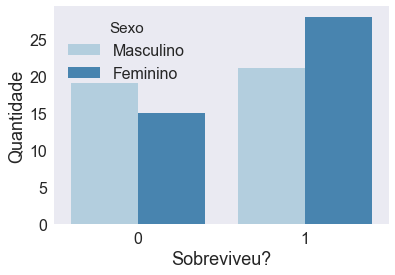

In [216]:
# Analisando se sobrevieram mais meninas ou meninos
sobreviventes_criancas = sns.countplot(data=criancas, x='Sobreviveu', hue='Sexo', palette='Blues')

plt.xlabel('Sobreviveu?')
plt.ylabel('Quantidade')
plt.show()

Quinta pergunta:<br>
<b>O capitão afundou com seu navio?</b>

In [ ]:
capitao = 'Edward John Smith'

In [253]:
nomes = titanic_data['Nome'].astype(str)
Smiths = []
for n in nomes:
    if 'Edward' in n:
        Smiths.append(n)
Smiths

['Wheadon, Mr. Edward H',
 'Minahan, Dr. William Edward',
 'Dorking, Mr. Edward Arthur',
 'Graham, Mr. George Edward',
 'Kent, Mr. Edward Austin',
 'Stanley, Mr. Edward Roland',
 'Beane, Mr. Edward',
 'Beane, Mrs. Edward (Ethel Clarke)',
 'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
 'Willey, Mr. Edward',
 'Colley, Mr. Edward Pomeroy',
 'Goodwin, Mr. Charles Edward',
 'Calderhead, Mr. Edward Pennington',
 'Ford, Mrs. Edward (Margaret Ann Watson)',
 'Crosby, Capt. Edward Gifford',
 'Abbott, Mr. Rossmore Edward',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)',
 'Giles, Mr. Frederick Edward']

In [254]:
# O capitão não esta nos dados do data set

Sexta pergunta:<br>
<b>Existia um Jack e uma Rose?</b>

In [294]:
jacks = []
for n in nomes:
    if 'Jack' in n:
        jacks.append(n)
jacks

['Brewe, Dr. Arthur Jackson']

In [295]:
titanic_data[titanic_data['Nome'] == jacks[0]]

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
766,0,1,"Brewe, Dr. Arthur Jackson",Masculino,29.70,0,0,39.60,Cherbourg


### Tinha um médico Jack, então não pode ser o Jack do filme pois esse está na primeira classe.

In [258]:
roses = []
for n in nomes:
    if 'Rose' in n:
        roses.append(n)
roses

['Aks, Mrs. Sam (Leah Rosen)']

In [297]:
titanic_data[titanic_data['Nome']==roses[0]]

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
855,1,3,"Aks, Mrs. Sam (Leah Rosen)",Feminino,18.00,0,1,9.35,Southampton


### Tinha uma Rose, mas ela estava na terceira classe. será que o filme foi feito invertido?